In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DeepLearning_Topics/DailyDelhiClimateTest.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [3]:
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [4]:
# We just want only 2 cols --> date, meantemp to show EWMA for now
df = df[['date', 'meantemp']]
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


In [5]:
df.shape

(114, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      114 non-null    object 
 1   meantemp  114 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


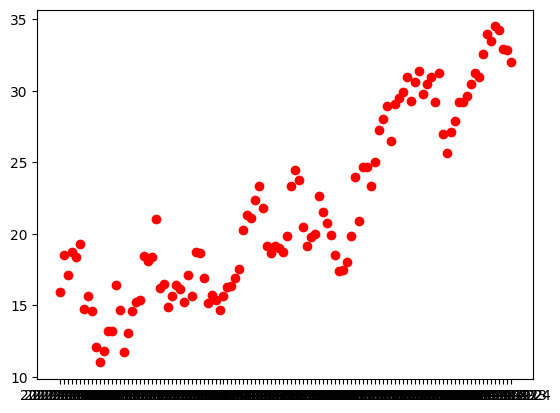

In [7]:
plt.scatter(df['date'], df['meantemp'], color='red')

## Writing own Function for EWMA

In [44]:
# writing own code for Exp WMA

# formula -->  V(t) = alpha * V(t-1) + (1 - alpha) * ele(t)
def exp_wma(df_vals, alpha=0.9, v0=0):
  ewma_values = []
  ewma_values.append(v0) # v(0) = ele(0)

  for i in range(1, len(df_vals)):
    ewma_values.append((alpha * ewma_values[i-1]) + ((1 - alpha) * df_vals[i]))

  return ewma_values

In [55]:
x1 = exp_wma(df['meantemp'], 0.9, df['meantemp'][0])
x1

[15.91304347826087,
 16.17173913043478,
 16.265676328502412,
 16.50910869565217,
 16.697086714975843,
 16.959196225296438,
 16.734109936100126,
 16.62911999512169,
 16.423350852752378,
 15.992126878588252,
 15.492914190729426,
 15.122570140077537,
 14.933842537834488,
 14.76045828405104,
 14.9278907165155,
 14.90010164486395,
 14.582313702599777,
 14.428248999006467,
 14.447328861010583,
 14.528911764383208,
 14.615151022727495,
 14.997635920454746,
 15.309637034291624,
 15.613455939558115,
 16.152110345602303,
 16.154756453899214,
 16.18928080850929,
 16.056716364021998,
 16.017711394286465,
 16.06038469930226,
 16.066846229372036,
 15.985161606434833,
 16.09573635488226,
 16.049799083030397,
 16.314819174727358,
 16.546495151991465,
 16.58073452568121,
 16.43516107311309,
 16.36164496580178,
 16.262980469221603,
 16.10334908896611,
 16.055514180069498,
 16.074962762062547,
 16.100799819189625,
 16.17821983727066,
 16.31754071068645,
 16.710786639617805,
 17.169707975656024,
 17.56523

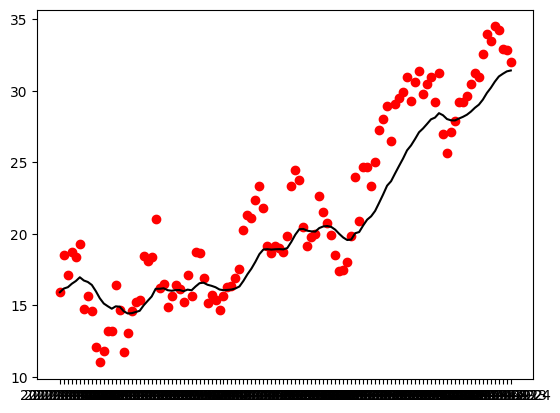

In [56]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x1, color='black')

## In-built EWMA function

In [57]:
x1 = df['meantemp'].ewm(alpha=0.1).mean()
x1

0      15.913043
1      17.274600
2      17.214272
3      17.646295
4      17.827632
         ...    
109    30.640166
110    31.001152
111    31.191039
112    31.359436
113    31.423493
Name: meantemp, Length: 114, dtype: float64

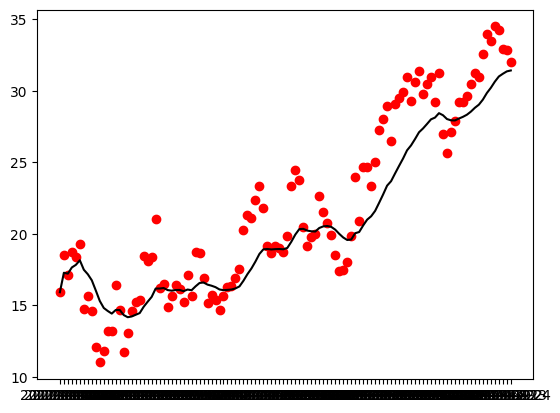

In [58]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x1, color='black')